In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
dataset = pd.read_csv('breast_cancer.csv')

In [3]:
print(dataset)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1        

<Axes: >

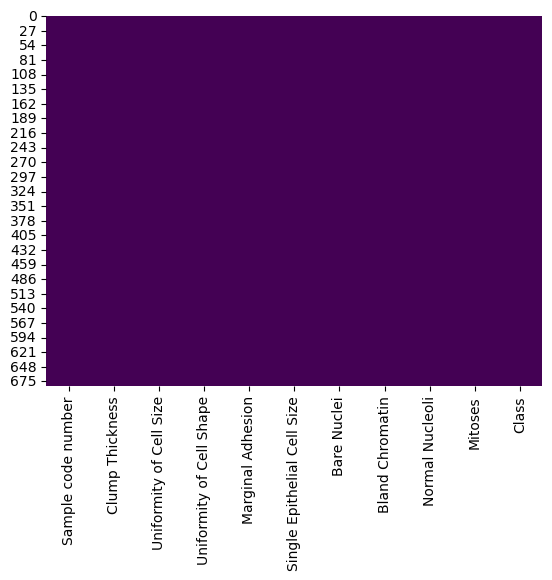

In [4]:
sns.heatmap(dataset.isnull(),cmap='viridis',cbar=False)

In [5]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [6]:
#split dataset to training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
X_train.shape

(546, 9)

In [8]:
y_train.shape

(546,)

In [9]:
X_test.shape

(137, 9)

In [10]:
y_test.shape

(137,)

<h3>LogisticRegressionModel</h3>

In [12]:
#training logistic regression model on training set
from sklearn.linear_model import LogisticRegression
logisticregression_classifier = LogisticRegression(random_state=0)
logisticregression_classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [13]:
y_predict_lr = logisticregression_classifier.predict(X_test)

In [14]:
result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_predict_lr.reshape(len(y_predict_lr),1)),1),columns=['Actual Values','Predicted Values'])

In [15]:
print(result)

     Actual Values  Predicted Values
0                2                 2
1                2                 2
2                4                 4
3                4                 4
4                2                 2
..             ...               ...
132              4                 4
133              2                 2
134              2                 2
135              4                 4
136              2                 2

[137 rows x 2 columns]


In [16]:
#evaluating logistic regression model
from sklearn.metrics import confusion_matrix,accuracy_score
lr_matrix = confusion_matrix(y_test,y_predict_lr)
lr_accuracy = accuracy_score(y_test,y_predict_lr)
print(lr_matrix)
print(lr_accuracy)

[[84  3]
 [ 3 47]]
0.9562043795620438


In [17]:
#Computing the accuracy with k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator=logisticregression_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f} %".format(accuracies_lr.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies_lr.std()*100))

Accuracy : 96.70 %
Standard Deviation : 1.97 %


<h3>KNN Model</h3>

In [19]:
#training KNN model on training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y_predict_knn = knn_classifier.predict(X_test)

In [21]:
result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_predict_knn.reshape(len(y_predict_knn),1)),1),columns=['Actual Values','Predicted Values'])

In [22]:
print(result)

     Actual Values  Predicted Values
0                2                 2
1                2                 2
2                4                 4
3                4                 4
4                2                 2
..             ...               ...
132              4                 4
133              2                 2
134              2                 2
135              4                 4
136              2                 2

[137 rows x 2 columns]


In [23]:
#calculating confusion matrix and accuracy
knn_matrix = confusion_matrix(y_test,y_predict_knn)
knn_accuracy = accuracy_score(y_test,y_predict_knn)
print(knn_matrix)
print(knn_accuracy)

[[84  3]
 [ 1 49]]
0.9708029197080292


In [24]:
#Computing the accuracy with k-Fold Cross Validation
accuracies_knn = cross_val_score(estimator=knn_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f} %".format(accuracies_knn.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies_knn.std()*100))

Accuracy : 97.44 %
Standard Deviation : 1.85 %


<h3>SVM</h3>

In [26]:
#training Linear SVM model on training set
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear',random_state=0)
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [27]:
y_predict_svm = svm_classifier.predict(X_test)

In [28]:
result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_predict_svm.reshape(len(y_predict_svm),1)),1),columns=['Actual Values','Predicted Values'])

In [29]:
print(result)

     Actual Values  Predicted Values
0                2                 2
1                2                 2
2                4                 4
3                4                 4
4                2                 2
..             ...               ...
132              4                 4
133              2                 2
134              2                 2
135              4                 4
136              2                 2

[137 rows x 2 columns]


In [30]:
#calculating confusion matrix and accuracy
svm_matrix = confusion_matrix(y_test,y_predict_svm)
svm_accuracy = accuracy_score(y_test,y_predict_svm)
print(svm_matrix)
print(svm_accuracy)

[[83  4]
 [ 2 48]]
0.9562043795620438


In [31]:
#Computing the accuracy with k-Fold Cross Validation
accuracies_svm = cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f} %".format(accuracies_svm.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies_svm.std()*100))

Accuracy : 97.07 %
Standard Deviation : 2.19 %


<h3>SVM Kernel</h3>

In [33]:
#training Kernel SVM model on training set
from sklearn.svm import SVC
svm_kernel_classifier = SVC(kernel='rbf',random_state=0)
svm_kernel_classifier.fit(X_train,y_train)

SVC(random_state=0)

In [34]:
y_predict_svm_kernel = svm_kernel_classifier.predict(X_test)

In [35]:
result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_predict_svm.reshape(len(y_predict_svm_kernel),1)),1),columns=['Actual Values','Predicted Values'])

In [36]:
print(result)

     Actual Values  Predicted Values
0                2                 2
1                2                 2
2                4                 4
3                4                 4
4                2                 2
..             ...               ...
132              4                 4
133              2                 2
134              2                 2
135              4                 4
136              2                 2

[137 rows x 2 columns]


In [37]:
#calculating confusion matrix and accuracy
svm_kernel_matrix = confusion_matrix(y_test,y_predict_svm_kernel)
svm_kernel_accuracy = accuracy_score(y_test,y_predict_svm_kernel)
print(svm_kernel_matrix)
print(svm_kernel_accuracy)

[[83  4]
 [ 1 49]]
0.9635036496350365


In [38]:
#Computing the accuracy with k-Fold Cross Validation
accuracies_svm_kernel = cross_val_score(estimator=svm_kernel_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f} %".format(accuracies_svm_kernel.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies_svm_kernel.std()*100))

Accuracy : 96.89 %
Standard Deviation : 2.17 %


<h3>Naive Bayes Model</h3>

In [40]:
#training Naive Bayes model on training set
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [41]:
y_predict_nb = nb_classifier.predict(X_test)

In [42]:
result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_predict_nb.reshape(len(y_predict_nb),1)),1),columns=['Actual Values','Predicted Values'])

In [43]:
print(result)

     Actual Values  Predicted Values
0                2                 2
1                2                 2
2                4                 4
3                4                 4
4                2                 2
..             ...               ...
132              4                 4
133              2                 2
134              2                 2
135              4                 4
136              2                 2

[137 rows x 2 columns]


In [44]:
#calculating confusion matrix and accuracy
nb_matrix = confusion_matrix(y_test,y_predict_nb)
nb_accuracy = accuracy_score(y_test,y_predict_nb)
print(nb_matrix)
print(nb_accuracy)

[[80  7]
 [ 0 50]]
0.948905109489051


In [45]:
#Computing the accuracy with k-Fold Cross Validation
accuracies_nb = cross_val_score(estimator=nb_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f} %".format(accuracies_nb.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies_nb.std()*100))

Accuracy : 96.52 %
Standard Deviation : 2.24 %


<h3>Decision Tree Model</h3>

In [47]:
#training Decision Tree model on training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
y_predict_dt = dt_classifier.predict(X_test)

In [49]:
result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_predict_dt.reshape(len(y_predict_dt),1)),1),columns=['Actual Values','Predicted Values'])

In [50]:
print(result)

     Actual Values  Predicted Values
0                2                 2
1                2                 2
2                4                 4
3                4                 4
4                2                 2
..             ...               ...
132              4                 4
133              2                 2
134              2                 2
135              4                 4
136              2                 2

[137 rows x 2 columns]


In [51]:
#calculating confusion matrix and accuracy
dt_matrix = confusion_matrix(y_test,y_predict_dt)
dt_accuracy = accuracy_score(y_test,y_predict_dt)
print(dt_matrix)
print(dt_accuracy)

[[84  3]
 [ 3 47]]
0.9562043795620438


In [52]:
#Computing the accuracy with k-Fold Cross Validation
accuracies_dt = cross_val_score(estimator=dt_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f} %".format(accuracies_dt.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies_dt.std()*100))

Accuracy : 94.33 %
Standard Deviation : 2.65 %


<h3>Random Forest Model</h3>

In [54]:
#training Random Forest model on training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [55]:
y_predict_rf = rf_classifier.predict(X_test)

In [56]:
result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_predict_rf.reshape(len(y_predict_rf),1)),1),columns=['Actual Values','Predicted Values'])

In [57]:
print(result)

     Actual Values  Predicted Values
0                2                 2
1                2                 2
2                4                 4
3                4                 4
4                2                 2
..             ...               ...
132              4                 4
133              2                 2
134              2                 2
135              4                 4
136              2                 2

[137 rows x 2 columns]


In [58]:
#calculating confusion matrix and accuracy
rf_matrix = confusion_matrix(y_test,y_predict_rf)
rf_accuracy = accuracy_score(y_test,y_predict_rf)
print(rf_matrix)
print(rf_accuracy)

[[83  4]
 [ 3 47]]
0.948905109489051


In [59]:
#Computing the accuracy with k-Fold Cross Validation
accuracies_rf = cross_val_score(estimator=rf_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f} %".format(accuracies_rf.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies_rf.std()*100))

Accuracy : 96.33 %
Standard Deviation : 2.01 %
